In [5]:
import matplotlib.pyplot as plt

In [60]:
def graph(n):
    for i in range(n):
        with open(f'logs/proc{i+1:02}.stderr', 'r') as f:
            lines = f.readlines()
        ms = [int(l.strip())*1e-3 for l in lines]

        plt.plot(ms, range(len(ms)))
        print(f'P{i+1:02}: {ms[-1]/len(ms):.5} µs')

## 1st Time Experiments

P01: 2501.3 µs
P02: 2512.3 µs


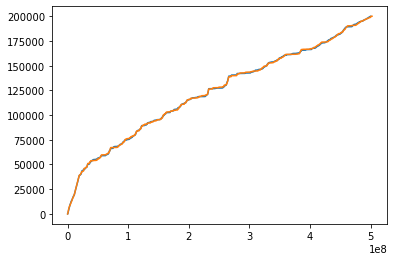

In [211]:
graph(2)

P01: 712.83 µs
P02: 701.41 µs
P03: 769.54 µs
P04: 696.09 µs
P05: 726.29 µs


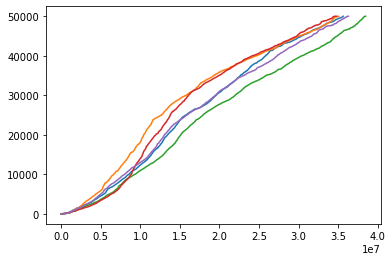

In [220]:
graph(5)

P01: 2576.0 µs
P02: 2473.1 µs
P03: 2489.1 µs
P04: 2517.6 µs
P05: 2496.2 µs
P06: 2501.8 µs
P07: 2396.4 µs
P08: 2481.3 µs
P09: 2444.4 µs
P10: 2325.9 µs


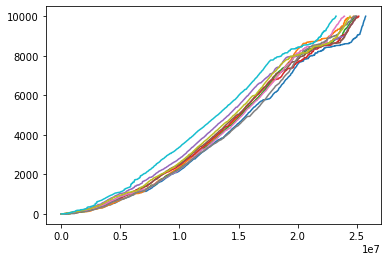

In [221]:
graph(10)

## 2nd: VectorClock implementation

P01: 2481.8 µs
P02: 2411.5 µs


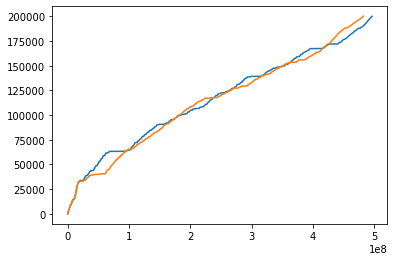

In [283]:
# Window of 1000
graph(2)

P01: 2541.8 µs
P02: 2666.4 µs


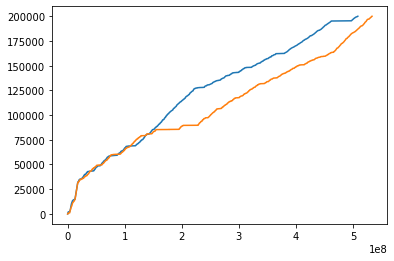

In [330]:
# Window of 2^15
graph(2)

P01: 537.82 µs
P02: 551.74 µs
P03: 539.23 µs
P04: 558.72 µs
P05: 544.69 µs


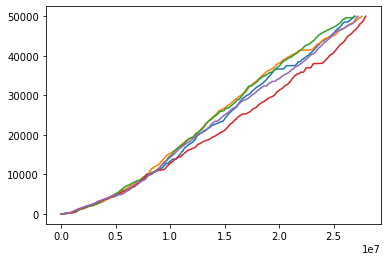

In [233]:
graph(5)

P01: 2326.2 µs
P02: 2208.5 µs
P03: 2298.5 µs
P04: 2276.2 µs
P05: 2498.6 µs
P06: 2230.2 µs
P07: 2237.8 µs
P08: 2219.0 µs
P09: 2365.3 µs
P10: 2313.4 µs


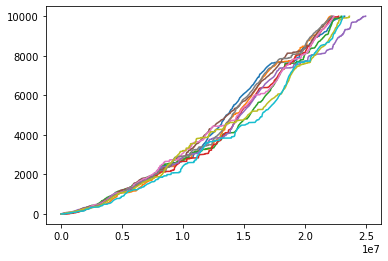

In [243]:
graph(10)

## 3rd: limit sending with seqNumber

P01: 2112.5 µs
P02: 2111.7 µs


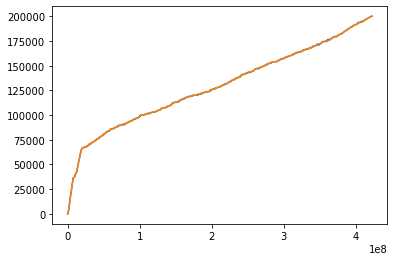

In [422]:
# Window of 2^10, cannot send packet if seqNumber too big
graph(2)

P01: 560.97 µs
P02: 567.37 µs
P03: 565.15 µs
P04: 522.45 µs
P05: 528.81 µs


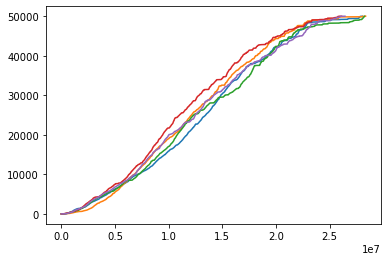

In [433]:
graph(5)

P01: 1977.5 µs
P02: 2127.0 µs
P03: 1902.2 µs
P04: 2234.7 µs
P05: 2188.3 µs
P06: 2247.3 µs
P07: 2435.3 µs
P08: 2624.1 µs
P09: 2198.0 µs
P10: 1956.8 µs


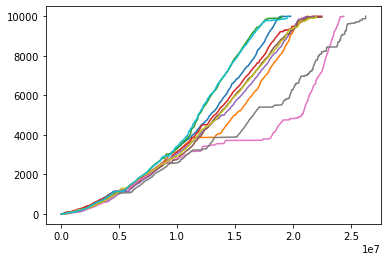

In [461]:
graph(10)

## 4th: remove ACKS quicker

better, not yet optimal

P01: 1845.4 µs
P02: 1844.4 µs


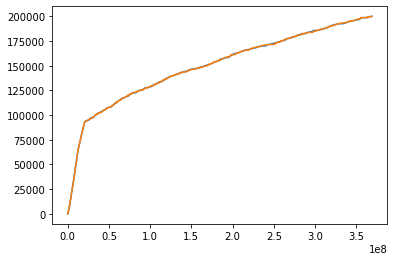

In [582]:
graph(2)

P01: 1921.7 µs
P02: 1920.5 µs


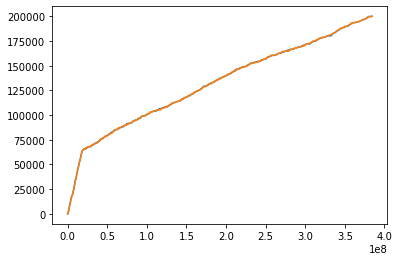

In [625]:
# Reduce packet size from 21 to 15 bytes
graph(2)

In [ ]:
# On my machine, not VM - 4 to 5 GB of memory???
graph(2)

P01: 457.66 µs
